<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 2 - Bike Sharing</h3>
</div>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

## Load and Prepare Data

In [2]:
data_train = pd.read_csv("train.csv")

## EDA

In [3]:
data_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [27]:
data_train.shape

(10886, 12)

In [28]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [29]:
data_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [30]:
data_train["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [31]:
data_train["holiday"].unique()

array([0, 1], dtype=int64)

In [32]:
data_train["workingday"].unique()

array([0, 1], dtype=int64)

In [33]:
data_train["weather"].unique()

array([1, 2, 3, 4], dtype=int64)

## Data Preprocessing

In [3]:
data_train.drop("datetime", axis = 1, inplace = True)
data_train.drop("casual", axis = 1, inplace = True)
data_train.drop("registered", axis = 1, inplace = True)

In [43]:
data_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,0,1,9.84,14.395,81,0.0000,16
1,1,0,0,1,9.02,13.635,80,0.0000,40
2,1,0,0,1,9.02,13.635,80,0.0000,32
3,1,0,0,1,9.84,14.395,75,0.0000,13
4,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336
10882,4,0,1,1,14.76,17.425,57,15.0013,241
10883,4,0,1,1,13.94,15.910,61,15.0013,168
10884,4,0,1,1,13.94,17.425,61,6.0032,129


In [4]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(sparse_output = False).set_output(transform = "pandas")
result = OHE.fit_transform(data_train[["season", "weather"]])

data_train.drop("season", axis = 1, inplace = True)
data_train.drop("weather", axis = 1, inplace = True)

data_train = pd.concat([result, data_train], axis = 1)

In [5]:
data_train

,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,holiday,workingday,temp,atemp,humidity,windspeed,count
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,9.84,14.395,81,0.0000,16
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,9.02,13.635,80,0.0000,40
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,9.02,13.635,80,0.0000,32
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,9.84,14.395,75,0.0000,13
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,15.58,19.695,50,26.0027,336
10882,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,14.76,17.425,57,15.0013,241
10883,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,13.94,15.910,61,15.0013,168
10884,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,13.94,17.425,61,6.0032,129


In [6]:
Y_train = data_train[["count"]]
X_train = data_train.drop("count", axis = 1)
X_train

,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,holiday,workingday,temp,atemp,humidity,windspeed
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,9.84,14.395,81,0.0000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,9.02,13.635,80,0.0000
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,9.02,13.635,80,0.0000
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,9.84,14.395,75,0.0000
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,15.58,19.695,50,26.0027
10882,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,14.76,17.425,57,15.0013
10883,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,13.94,15.910,61,15.0013
10884,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,13.94,17.425,61,6.0032


In [61]:
Y_train

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)

In [8]:
X_train

array([[ 1.74724547, -0.57897671, -0.57897671, ..., -1.09273697,
         0.99321305, -1.56775367],
       [ 1.74724547, -0.57897671, -0.57897671, ..., -1.18242083,
         0.94124921, -1.56775367],
       [ 1.74724547, -0.57897671, -0.57897671, ..., -1.18242083,
         0.94124921, -1.56775367],
       ...,
       [-0.57232943, -0.57897671, -0.57897671, ..., -0.91395927,
        -0.04606385,  0.26970368],
       [-0.57232943, -0.57897671, -0.57897671, ..., -0.73518157,
        -0.04606385, -0.83244247],
       [-0.57232943, -0.57897671, -0.57897671, ..., -0.82486544,
         0.21375537, -0.46560752]])

In [23]:
Y_train = Y_train.reshape((10886,))
Y_train.shape

(10886,)

## Training

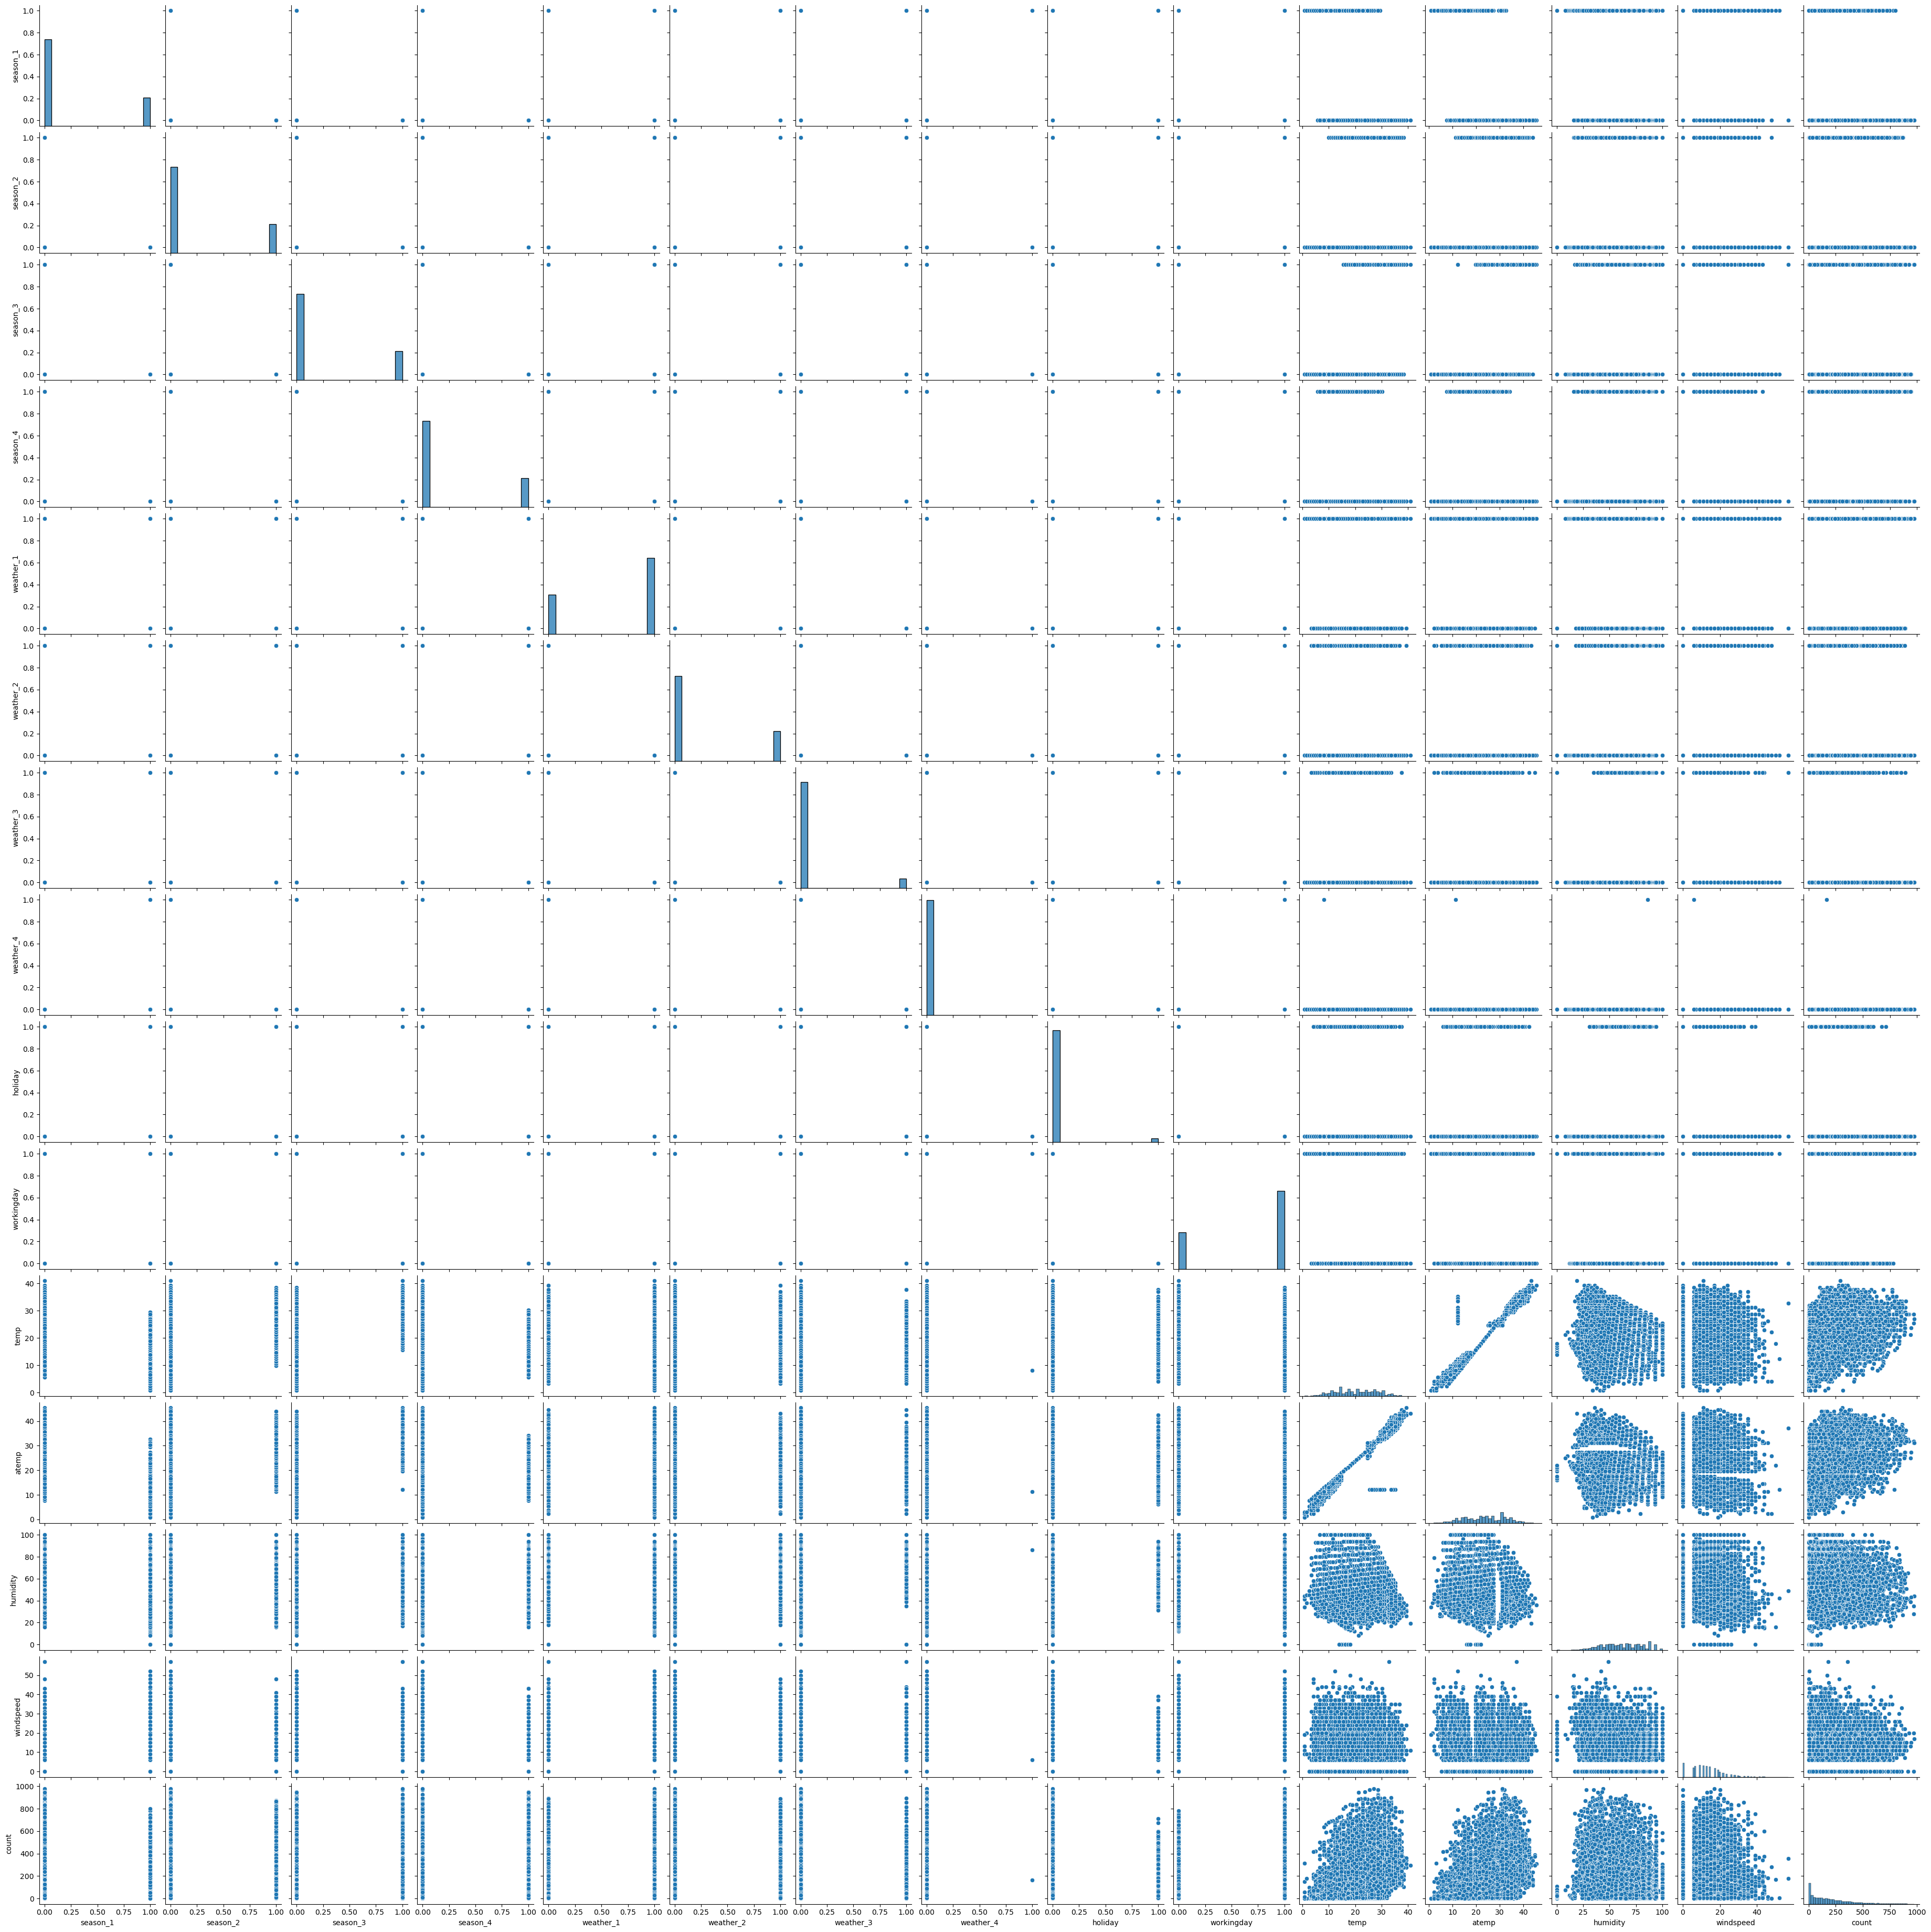

In [69]:
sns.pairplot(data_train)

<Axes: >

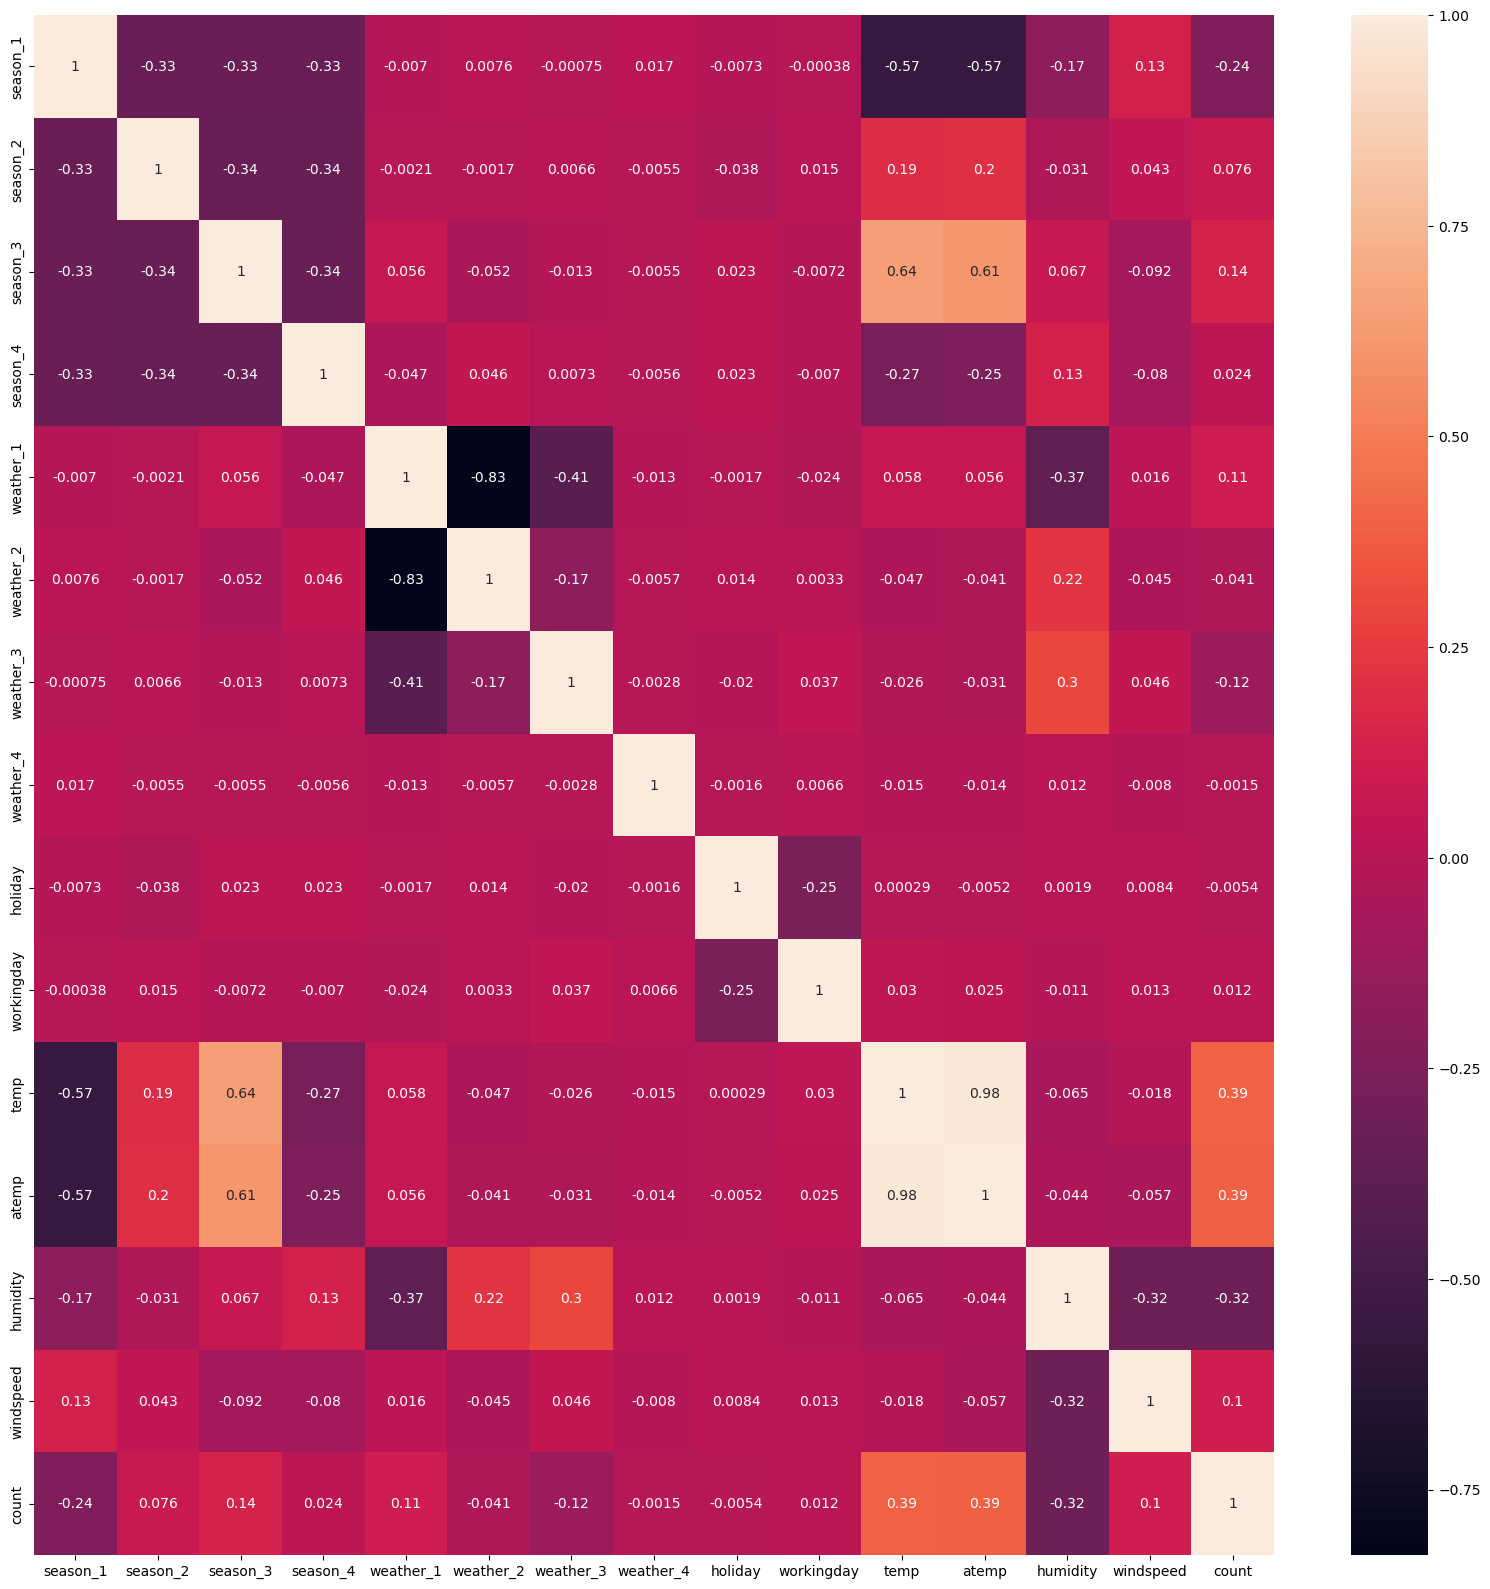

In [71]:
correlation = data_train.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlation, annot = True)

In [24]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes = (100, 50), learning_rate_init = 0.01, tol = 0.001, random_state = 42, max_iter = 200)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
from sklearn import metrics
metrics.r2_score(Y_train, Y_pred)

0.44049407684503583